In [2]:
%matplotlib inline
import os
from os.path import join
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from glob import glob
from pylab import *

### It was necessary to rerun creation of the learning curve accuracy probability files due to the originals being structured as sets rather than runs

In [ ]:
################################################################
### NOTE !! ONLY NEED TO RUN THIS ONCE FOR EACH PARTICIPANT ####
################################################################
# This cell will take the log file and isolate the correct/incorrect performance for each 
# stimulus type A, B, and C and then save a .csv file in each participant's directory

#subs = ['WMAZE_001']

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']

stim_type = ['A', 'B', 'C']
# Get the CSV file for each participant
for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    dir_files = glob(sub_dir + '{0}_wmazebl_2015*.txt'.format(sub))
    dir_files.sort()
    #print dir_files
    
    data_run1 = pd.read_table(dir_files[0])
    data_run2 = pd.read_table(dir_files[1])
    data_run3 = pd.read_table(dir_files[2])
    data_run4 = pd.read_table(dir_files[3])
    data_run5 = pd.read_table(dir_files[4])
    data_run6 = pd.read_table(dir_files[5])  
    
    for curr_stim in stim_type:
        only_curr_stim_run1 = data_run1.query('TrialType == "%s"'%curr_stim)
        only_curr_stim_run1_corr = only_curr_stim_run1['Correct']
        only_curr_stim_run1_corr_noNAN = only_curr_stim_run1_corr.fillna(0)
        
        only_curr_stim_run2 = data_run2.query('TrialType == "%s"'%curr_stim)
        only_curr_stim_run2_corr = only_curr_stim_run2['Correct']
        only_curr_stim_run2_corr_noNAN = only_curr_stim_run2_corr.fillna(0)
        
        only_curr_stim_run3 = data_run3.query('TrialType == "%s"'%curr_stim)
        only_curr_stim_run3_corr = only_curr_stim_run3['Correct']
        only_curr_stim_run3_corr_noNAN = only_curr_stim_run3_corr.fillna(0)
        
        only_curr_stim_run4 = data_run4.query('TrialType == "%s"'%curr_stim)
        only_curr_stim_run4_corr = only_curr_stim_run4['Correct']
        only_curr_stim_run4_corr_noNAN = only_curr_stim_run4_corr.fillna(0)
        
        only_curr_stim_run5 = data_run5.query('TrialType == "%s"'%curr_stim)
        only_curr_stim_run5_corr = only_curr_stim_run5['Correct']
        only_curr_stim_run5_corr_noNAN = only_curr_stim_run5_corr.fillna(0)
        
        only_curr_stim_run6 = data_run6.query('TrialType == "%s"'%curr_stim)
        only_curr_stim_run6_corr = only_curr_stim_run6['Correct']
        only_curr_stim_run6_corr_noNAN = only_curr_stim_run6_corr.fillna(0)
        #print only_curr_stim_run6_corr_noNAN
        
        only_curr_stim_run1_corr_noNAN.to_csv(sub_dir + '%s_corr_run1.csv'%curr_stim, index=False)
        only_curr_stim_run2_corr_noNAN.to_csv(sub_dir + '%s_corr_run2.csv'%curr_stim, index=False)
        only_curr_stim_run3_corr_noNAN.to_csv(sub_dir + '%s_corr_run3.csv'%curr_stim, index=False)
        only_curr_stim_run4_corr_noNAN.to_csv(sub_dir + '%s_corr_run4.csv'%curr_stim, index=False)
        only_curr_stim_run5_corr_noNAN.to_csv(sub_dir + '%s_corr_run5.csv'%curr_stim, index=False)
        only_curr_stim_run6_corr_noNAN.to_csv(sub_dir + '%s_corr_run6.csv'%curr_stim, index=False)
        
# IMPORTANT
# After running this cell you MUST run the wmazebl_plotmemstr.m file in matlab.
# This will calculate the relevant pmode, p95, p05 data and save the text files that are required
# for the below cell

### Isolating trials of learning -- all 21 together

In [ ]:
subs = ['WMAZE_002']

#subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
#        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
#        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
#        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']


runs = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6']


for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    curve_files = glob(join(sub_dir, 'MRthesis/B_pmode_run*.txt'))    
    curve_files.sort() 
    behav_runs = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub))) 
    behav_runs.sort()
    #print behav_runs
    #print curve_files
    
    for i, run in enumerate(runs):
        behav_run = pd.read_table(behav_runs[i])
        curr_curve = np.loadtxt(curve_files[i])
        #print curve_files[i]
        #print curr_curve
        

        #get first derivative of current curve file
        curr_frst_d1 = np.gradient(curve)*10
        #print x
        plt.plot(curr_curve)
        #plt.plot(curr_frst_d1)
        plt.show()
        
        #grabs the index of the greatest value in array
        target_trial = np.argmax(curr_frst_d1)
        print target_trial
    
        behav_type = behav_run['TrialType'].values
        behav_os = behav_run['StimOnset'].values
        behav_acc = behav_run['Correct'].values

        #indices of all Bs in the original dataset
        b_indices = np.where(behav_type == 'B')[0]
        
        #grab the surrounding 20 trials
        b_learning = b_indices[target_trial-10:target_trial+11]      
        b4_Bs = b_learning-1
        
        #gets the fixed trial before condition when BLs are between
        for i, curr_b4 in enumerate(b4_Bs):
            while behav_type[b4_Bs[i]] == "BL":
                b4_Bs[i] -= 1
        
        #grabs the original fixed trials after accounting for unwanted BLs     
        fixed_learning_all21_onsets = behav_os[b4_Bs]
        
        
        fixed_learning_all21_mtrx = np.vstack((fixed_learning_all21_onsets, 
                                               np.ones(len(fixed_learning_all21_onsets)) * 3.0,
                                               np.ones(len(fixed_learning_all21_onsets)))).T
        
        
        if not os.path.exists(join(sub_dir, 'MRthesis/', 'modelLSS_targ_all21/', 'EVs/')):
            os.makedirs(join(sub_dir, 'MRthesis/', 'modelLSS_targ_split21/', 'EVs/')) 
             
        np.savetxt(sub_dir + '/MRthesis/' + 'modelLSS_targ_all21/' + 'EVs/' + 
                   'fixed_learning_all21_{0}.txt'.format(curr_run), 
                   fixed_learning_all21_mtrx, delimiter = '\t', fmt = '%.4f')


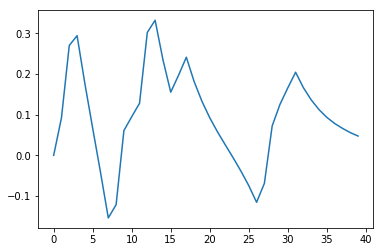

NameError: name 'curr_frst_d1' is not defined

In [7]:
subs = ['WMAZE_002']

#subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
#        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
#        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
#        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']



sets = ['set1', 'set2', 'set3']


for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    deriv_files = glob(join(sub_dir, 'Bprime_pmode_set*.txt'))    
    deriv_files.sort() 
    behav_runs = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub))) 
    behav_runs.sort()
    #print behav_runs
    #print curve_files
    
    for i, curr_set in enumerate(sets):
        behav_run = pd.read_table(behav_runs[i])
        curr_d1 = np.loadtxt(deriv_files[i])
        #print curve_files[i]
        #print curr_curve
        
        run1_d1 = curr_d1[:40]
        run2_d1 = curr_d1[40:]
        
        #plt.plot(run1_d1)
        plt.plot(run1_d1)
        #plt.plot(curr_frst_d1)
        plt.show()
        
        #grabs the index of the greatest value in array
        target_trial = np.argmax(curr_frst_d1)
        print target_trial
    
        behav_type = behav_run['TrialType'].values
        behav_os = behav_run['StimOnset'].values

        #indices of all Bs in the original dataset
        b_indices = np.where(behav_type == 'B')[0]
        
        #grab the surrounding 20 trials
        b_learning = b_indices[target_trial-10:target_trial+11]      
        b4_Bs = b_learning-1
        
        #gets the fixed trial before condition when BLs are between
        for i, curr_b4 in enumerate(b4_Bs):
            while behav_type[b4_Bs[i]] == "BL":
                b4_Bs[i] -= 1
        
        #grabs the original fixed trials after accounting for unwanted BLs     
        fixed_learning_all21_onsets = behav_os[b4_Bs]
        
        
        fixed_learning_all21_mtrx = np.vstack((fixed_learning_all21_onsets, 
                                               np.ones(len(fixed_learning_all21_onsets)) * 3.0,
                                               np.ones(len(fixed_learning_all21_onsets)))).T
        
        
        if not os.path.exists(join(sub_dir, 'MRthesis/', 'modelLSS_targ_all21/', 'EVs/')):
            os.makedirs(join(sub_dir, 'MRthesis/', 'modelLSS_targ_split21/', 'EVs/')) 
             
        np.savetxt(sub_dir + '/MRthesis/' + 'modelLSS_targ_all21/' + 'EVs/' + 
                   'fixed_learning_all21_{0}.txt'.format(curr_run), 
                   fixed_learning_all21_mtrx, delimiter = '\t', fmt = '%.4f')


In [ ]:
subs = ['WMAZE_004']

#subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
#        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
#        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
#        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']


runs = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6']
sets = ['set1', 'set2', 'set3']

for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    curve_files = glob(join(sub_dir, 'B_pmode_set*.txt'))   
    deriv_files = glob(join(sub_dir, 'Bprime_pmode_set*.txt'))
    deriv_files.sort()
    curve_files.sort() 
    behav_runs = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub))) 
    behav_runs.sort()
    #print behav_runs
    #print deriv_files
    
    for i, curr_set in enumerate(sets):
        curve = np.loadtxt(curve_files[i])
        deriv_file = np.loadtxt(deriv_files[i])
        curr_frst_d1 = np.gradient(curve)*10
        #print deriv_file
        plt.plot(curve)
        plt.plot(deriv_file)
        plt.plot(curr_frst_d1)
        plt.show()

In [ ]:
#subs = ['WMAZE_001']

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']


runs = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6']


for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    frst_d_file = glob(join(sub_dir, 'Bprime_pmode_run*.txt'))    
    frst_d_file.sort() 
    behav_runs = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub))) 
    behav_runs.sort()
    
    for i, curr_run in enumerate(runs):
        curr_frst_d = np.loadtxt(frst_d_file[i])
        #grabs the index of the greatest value in array
        target_trial = np.argmax(curr_frst_d)
        behav_run1 = pd.read_table(behav_runs[i * 2])
        behav_run2 = pd.read_table(behav_runs[i * 2 + 1])
        
        
        #create array and combine the two original data runs to match Bprime_pmode        
        behav_set = np.empty(320, dtype = object)
        behav_os = np.empty(320, dtype = object)
        behav_set[:160] = behav_run1['TrialType'].values
        behav_set[160:] = behav_run2['TrialType'].values
        behav_os[:160] = behav_run1['StimOnset'].values
        behav_os[160:] = behav_run2['StimOnset'].values
        
        #indices of all Bs in the original dataset
        b_indices = np.where(behav_set == 'B')[0]
        
        #grab the surrounding 20 trials
        b_learning = b_indices[target_trial-10:target_trial+11]      
        b4_Bs = b_learning-1
        
        for i, curr_b4 in enumerate(b4_Bs):
            while behav_set[b4_Bs[i]] == "BL":
                b4_Bs[i] -= 1
            
        fixed_learning = behav_set[b4_Bs]
        
        
        fixed_learning_10before_onsets = behav_os[b4_Bs[:10]]
        fixed_learning_10after_onsets = behav_os[b4_Bs[11:]]
        
        
        fixed_learning_10before_mtrx = np.vstack((fixed_learning_10before_onsets, 
                                                 np.ones(len(fixed_learning_10before_onsets)) * 3.0,
                                                 np.ones(len(fixed_learning_10before_onsets)))).T
        
        fixed_learning_10after_mtrx = np.vstack((fixed_learning_10after_onsets, 
                                                 np.ones(len(fixed_learning_10after_onsets)) * 3.0,
                                                 np.ones(len(fixed_learning_10after_onsets)))).T
        
        
        if not os.path.exists(join(sub_dir, 'MRthesis/', 'modelLSS_targ_split20/', 'EVs/')):
            os.makedirs(join(sub_dir, 'MRthesis/', 'modelLSS_targ_split20/', 'EVs/')) 
             
        np.savetxt(sub_dir + '/MRthesis/' + 'modelLSS_targ_split20/' + 'EVs/' + 
                   'fixed_learning_10before_{0}.txt'.format(curr_set), 
                   fixed_learning_10before_mtrx, delimiter = '\t', fmt = '%.4f')
        
        np.savetxt(sub_dir + '/MRthesis/' + 'modelLSS_targ_split20/' + 'EVs/' + 
                   'fixed_learning_10after_{0}.txt'.format(curr_set), 
                   fixed_learning_10after_mtrx, delimiter = '\t', fmt = '%.4f')


In [ ]:
#subs = ['WMAZE_001']

subs = ['WMAZE_001', 'WMAZE_002', 'WMAZE_004', 'WMAZE_005', 'WMAZE_006',
        'WMAZE_007', 'WMAZE_008', 'WMAZE_009', 'WMAZE_010', 'WMAZE_012',
        'WMAZE_017', 'WMAZE_018', 'WMAZE_019', 'WMAZE_020', 'WMAZE_021',
        'WMAZE_022', 'WMAZE_023', 'WMAZE_024', 'WMAZE_026', 'WMAZE_027']


runs = ['run1', 'run2', 'run3', 'run4', 'run5', 'run6']


for sub in subs:
    sub_dir = '/home/data/madlab/data/mri/wmaze/scanner_behav/{0}/'.format(sub)
    curve_files = glob(join(sub_dir, 'MRthesis/B_pmode_run*.txt'))    
    curve_files.sort() 
    behav_runs = glob(join(sub_dir, '{0}_wmazebl_2015*.txt'.format(sub))) 
    behav_runs.sort()
    #print behav_runs
    #print curve_files
    
    for i, curr_run in enumerate(runs):
        behav_run1 = pd.read_table(behav_runs[i])
        curr_curve = np.loadtxt(curve_files[i])
        
        #create equally-spaced array the length of curve_file
        x = np.linspace(0,40, num = 41)
        #get first derivative of current curve file
        curr_frst_d = np.diff(curr_curve)/np.diff(x)
        #print x
        #print len(curr_curve)
        
        #grabs the index of the greatest value in array
        target_trial = np.argmax(curr_frst_d)
       
                
        behav_set = behav_run1['TrialType'].values
        behav_os = behav_run1['StimOnset'].values

        
        #indices of all Bs in the original dataset
        b_indices = np.where(behav_set == 'B')[0]
        
        #grab the surrounding 20 trials
        b_learning = b_indices[target_trial-10:target_trial+11]      
        b4_Bs = b_learning-1
        
        #gets the fixed trial before condition when BLs are between
        for i, curr_b4 in enumerate(b4_Bs):
            while behav_set[b4_Bs[i]] == "BL":
                b4_Bs[i] -= 1
        
        #grabs the original fixed trials after accounting for unwanted BLs
        fixed_learning = behav_set[b4_Bs]
        
        #separates fixed learning into 10 before and 10 after highest first derivative point
        fixed_learning_10before_onsets = behav_os[b4_Bs[:10]]
        fixed_learning_10after_onsets = behav_os[b4_Bs[11:]]
        
        
        #creates matrix containing onsets, amplitudes, &  for 10 before
        fixed_learning_10before_mtrx = np.vstack((fixed_learning_10before_onsets, 
                                                 np.ones(len(fixed_learning_10before_onsets)) * 3.0,
                                                 np.ones(len(fixed_learning_10before_onsets)))).T
        
        #creates matrix containing onsets, amplitudes, &  for 10 after
        fixed_learning_10after_mtrx = np.vstack((fixed_learning_10after_onsets, 
                                                 np.ones(len(fixed_learning_10after_onsets)) * 3.0,
                                                 np.ones(len(fixed_learning_10after_onsets)))).T
        
        #creates pathway/location for new files
        if not os.path.exists(join(sub_dir, 'MRthesis/', 'modelLSS_targ_split20/', 'EVs/')):
            os.makedirs(join(sub_dir, 'MRthesis/', 'modelLSS_targ_split20/', 'EVs/')) 
       
    
        #saves 10 before matrix
        np.savetxt(sub_dir + '/MRthesis/' + 'modelLSS_targ_split20/' + 'EVs/' + 
                   'fixed_learning_10before_{0}.txt'.format(curr_run), 
                   fixed_learning_10before_mtrx, delimiter = '\t', fmt = '%.4f')

        #saves 10 after matrix
        np.savetxt(sub_dir + '/MRthesis/' + 'modelLSS_targ_split20/' + 'EVs/' + 
                   'fixed_learning_10after_{0}.txt'.format(curr_run), 
                   fixed_learning_10after_mtrx, delimiter = '\t', fmt = '%.4f')
